## Python Visualizations - Matplotlib and Seaborn
1. Bar plots
2. Scatter plot
3. Plotting in multiple subplots

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ploting Barplots

In [10]:
#display the counts of categorical features, as well as compare the counts across the features.
counties=['Nairobi','Mombasa','Kisumu','Garissa','Eldoret']
schools=[105,96,140,39,160]


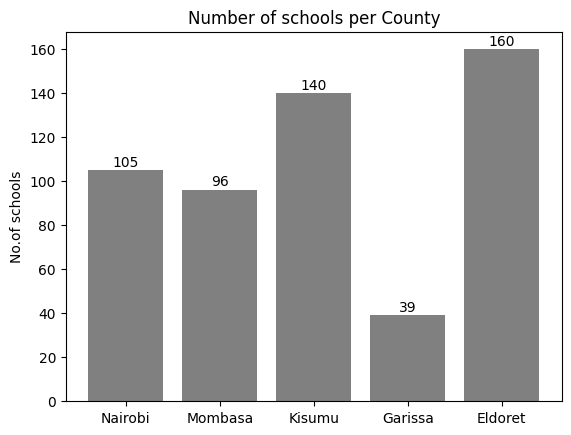

In [11]:
plt.bar(counties,schools,color='grey')

plt.title('Number of schools per County')
plt.ylabel('No.of schools')

#annotations
for x, height in enumerate (schools):
    plt.text(x, height+2, str(height),ha='center')


plt.show()

### Plotting a grouped bar chart

In [13]:
counties=['Nairobi','Mombasa','Kisumu','Garissa','Eldoret']
boy_schools=[102,79,87,40,100]
girl_schools=[99,65,95,25,99]

In [30]:
x=np.arange(len(counties))
x

array([0, 1, 2, 3, 4])

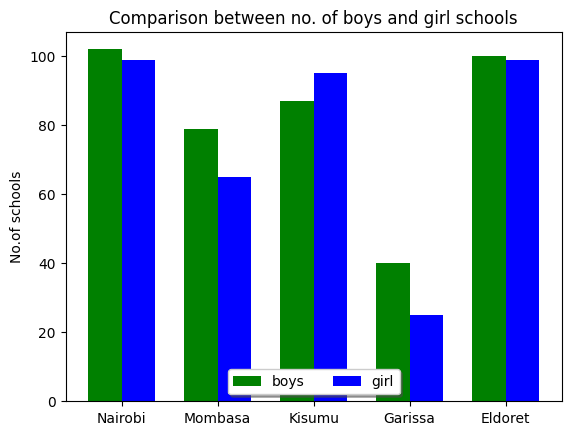

In [29]:
bar_width=0.35
x=np.arange(len(counties))

plt.bar(x-bar_width/2, boy_schools,bar_width,label='boys',color='green')
plt.bar(x+bar_width/2, girl_schools,bar_width,label='girl',color='blue')



plt.title('Comparison between no. of boys and girl schools')
plt.ylabel('No.of schools')
plt.legend(loc='lower center',fancybox=True, ncol=2,shadow=True)
plt.xticks(x,counties)
plt.show()

### Stacked Bar charts

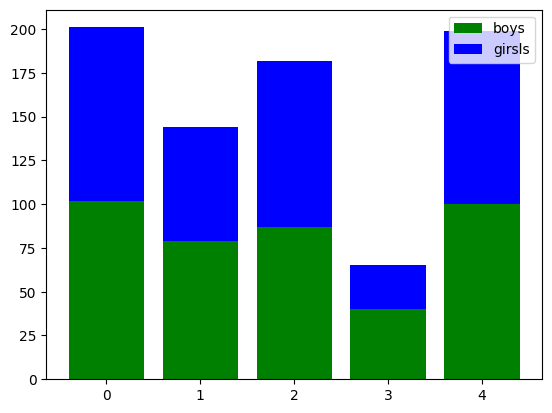

In [32]:
bar_width=0.35
x=np.arange(len(counties))

plt.bar(x,boy_schools,label='boys',color='green')
plt.bar(x,girl_schools, bottom=boy_schools, label='girsls',color= 'blue')

plt.legend()
plt.show()

## Scatter Plots with Matplotlib

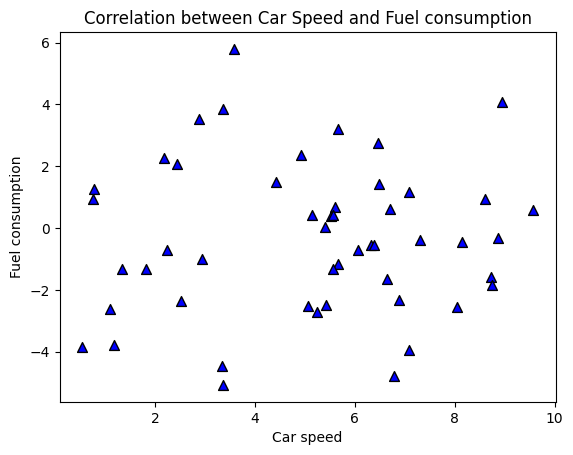

In [40]:
x=np.random.uniform(0,10,50)
y=np.random.normal(0,2,50)

plt.xlabel('Car speed')
plt.ylabel('Fuel consumption')
plt.title('Correlation between Car Speed and Fuel consumption')
plt.scatter(x,y, marker='^', color='blue',s=50, edgecolor='black')
plt.show()

### Colour/ Color bars

In [41]:
# We have temperature data taken from different latitides and longitudes.

lat=np.random.uniform(-100,-70, 50)
long=np.random.uniform(30,50,50)

temp=np.random.uniform(0,40,50)

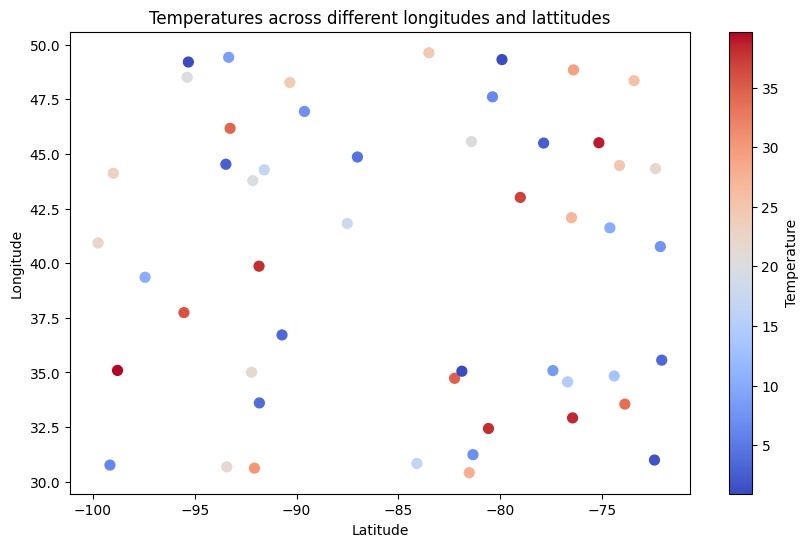

In [47]:
plt.figure(figsize=(10,6))

scatter=plt.scatter(lat,long, c=temp, cmap='coolwarm',s=50)

cbar=plt.colorbar(scatter)
cbar.set_label('Temperature')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Temperatures across different longitudes and lattitudes')
plt.show()

##### Add annotations/text to a scatter plot

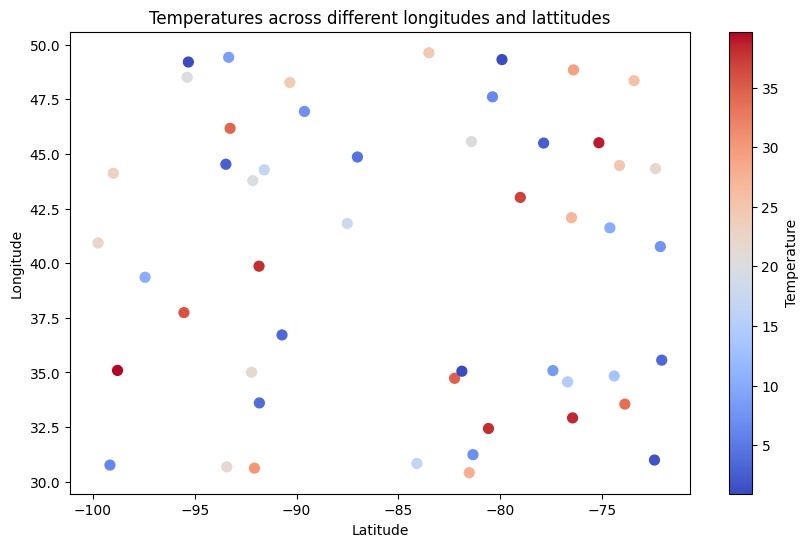

In [51]:
plt.figure(figsize=(10,6))
max_temp=np.argmax(temp)

scatter=plt.scatter(lat,long, c=temp, cmap='coolwarm',s=50)

cbar=plt.colorbar(scatter)
cbar.set_label('Temperature')

plt.annotate(
    f'Max temp:{temp[max_temp]:} C',
    (x[max_temp],y[max_temp]),
    textcoords='offset points',
    xytext=(10,10),
    arrowprops=dict(arrowstyle='->',color='black')
)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Temperatures across different longitudes and lattitudes')
plt.show()

### Plotting in multiple subplots

C:\Users\Pula Advisors\AppData\Local\Temp\ipykernel_19400\3967830053.py:5: RuntimeWarning: divide by zero encountered in log
  y4=np.log(x)


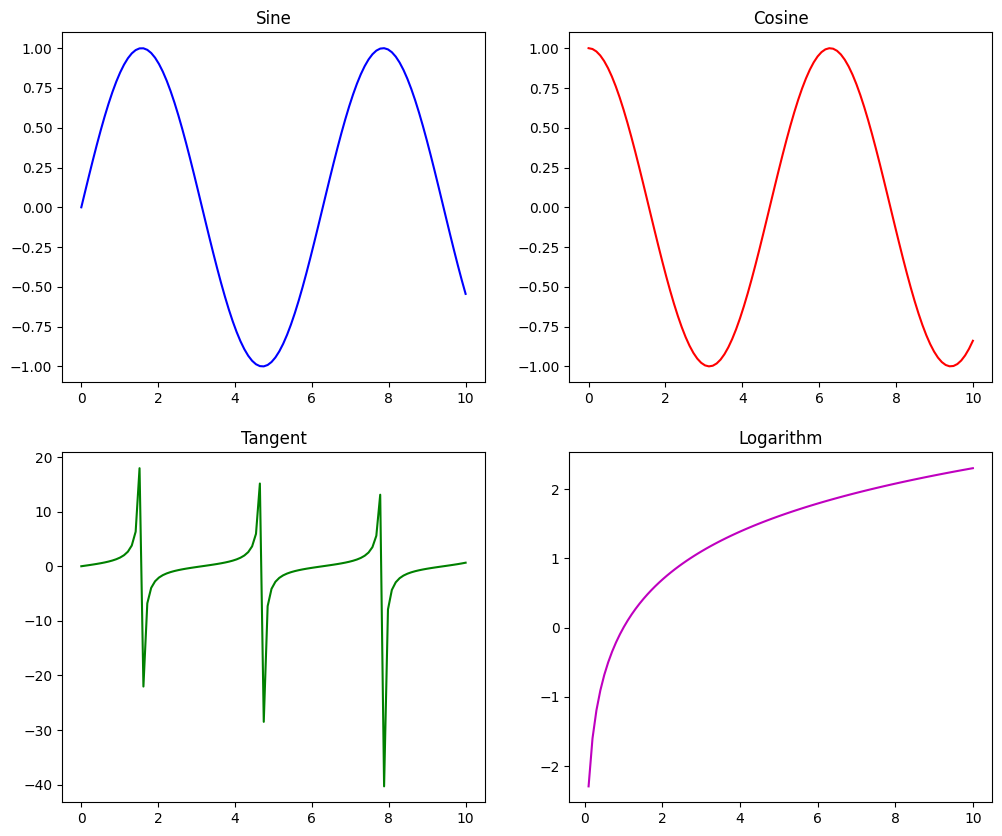

In [ ]:
x=np.linspace(0,10,100)
y1=np.sin(x)
y2=np.cos(x)
y3=np.tan(x)
y4=np.log(x)

fig,axs=plt.subplots(2,2,figsize=(12,10))

axs[0,0].plot(x,y1,'b-')
axs[0,0].set_title('Sine')

axs[0,1].plot(x,y2,'r-')
axs[0,1].set_title('Cosine')

axs[1,0].plot(x,y3,'g-')
axs[1,0].set_title('Tangent')

axs[1,1].plot(x,y4,'m-')
axs[1,1].set_title('Logarithm')

plt.show()